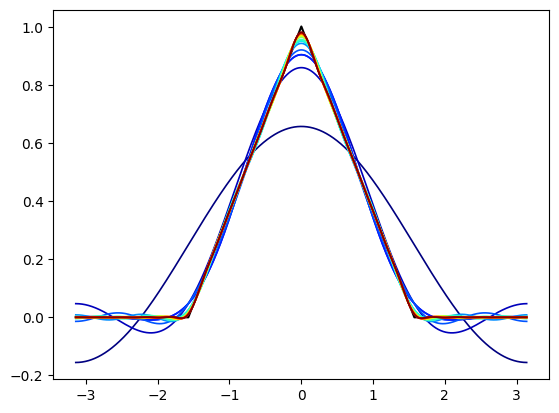

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define domain
dx = 0.001
L = np.pi
x = np.arange(-1 + dx, 1 + dx, dx) * L
n = len(x)
nquart = np.floor(n / 4).astype(int)

# Define hat function
f = np.zeros_like(x)
f[nquart:2 * nquart + 1] = 4 * np.arange(1, nquart + 2) / n
f[2 * nquart + 1:3 * nquart + 1] = 1 - 4 * np.arange(0, nquart) / n

plt.plot(x, f, '-k', linewidth=1.5)


# Compute Fourier series
CC = plt.get_cmap('jet')(np.linspace(0, 1, 20))
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0 / 2

for k in range(1, 21):
    A_k = np.sum(f * np.cos(np.pi * k * x / L)) * dx
    B_k = np.sum(f * np.sin(np.pi * k * x / L)) * dx
    fFS = fFS + A_k * np.cos(k * np.pi * x / L) + B_k * np.sin(k * np.pi * x / L)
    plt.plot(x, fFS, '-', color=CC[k - 1], linewidth=1.2)

plt.show()


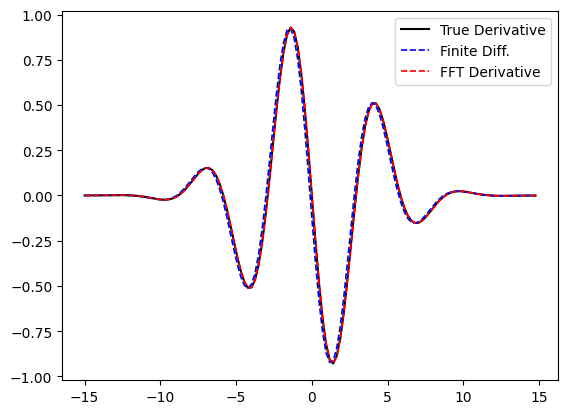

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 128
L = 30
dx = L / n

# Create x values
x = np.linspace(-L / 2, L / 2 - dx, n)
f = np.cos(x) * np.exp(-x**2 / 25)  # Function
df = -(np.sin(x) * np.exp(-x**2 / 25) + (2 / 25) * x * f)  # True Derivative

# Approximate derivative using finite difference
dfFD = np.diff(f) / dx
dfFD = np.append(dfFD, dfFD[-1])

# Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2 * np.pi / L) * np.fft.fftshift(np.arange(-n / 2, n / 2))
dfhat = 1j * kappa * fhat
dfFFT = np.real(np.fft.ifft(dfhat))

# Plotting commands
plt.plot(x, df, 'k', linewidth=1.5)
plt.plot(x, dfFD, 'b--', linewidth=1.2)
plt.plot(x, dfFFT, 'r--', linewidth=1.2)
plt.legend(['True Derivative', 'Finite Diff.', 'FFT Derivative'])
plt.show()


## Gibbs phenomena

Gibbs phenomena is characterized by high-frequency oscillations
near discontinuities. The black curve is discontinuous, and the red curve is the
Fourier approximation.

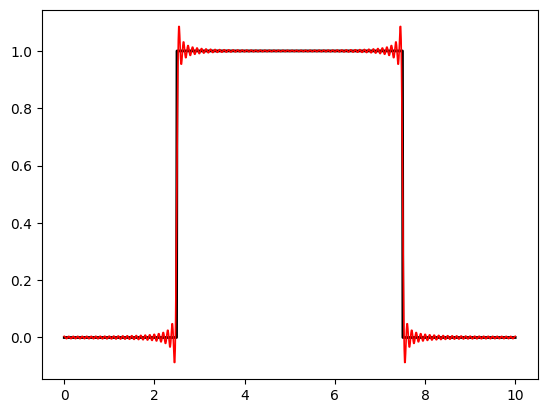

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
dx = 0.01
L = 10

# Create x values
x = np.arange(0, L + dx, dx)
n = len(x)
nquart = np.floor(n / 4).astype(int)

# Define step function
f = np.zeros_like(x)
f[nquart:3 * nquart + 1] = 1

# Compute Fourier series
A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0 / 2

for k in range(1, 101):
    Ak = np.sum(f * np.cos(2 * np.pi * k * x / L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2 * np.pi * k * x / L)) * dx * 2 / L
    fFS = fFS + Ak * np.cos(2 * k * np.pi * x / L) + Bk * np.sin(2 * k * np.pi * x / L)

# Plotting
plt.plot(x, f, 'k', linewidth=2)
plt.plot(x, fFS, 'r-', linewidth=1.2)
plt.show()


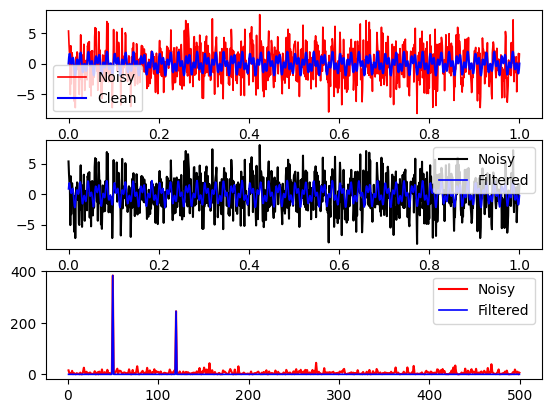

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
dt = 0.001
t = np.arange(0, 1 + dt, dt)

# Create a signal with noise
f1 = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)
f2 = f1 + 2.5 * np.random.randn(len(t))

# Compute the Fast Fourier Transform (FFT)
n = len(t)
fhat = np.fft.fft(f2, n)  # Compute the fast Fourier transform
PSD = fhat * np.conj(fhat) / n  # Power spectrum (power per freq)
freq = 1 / (dt * n) * np.arange(0, n + 1)  # Create x-axis of frequencies in Hz
L = np.arange(1, np.floor(n / 2) + 1).astype(int)  # Only plot the first half of freqs

# Use the PSD to filter out noise
indices = PSD > 100  # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat  # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat)  # Inverse FFT for filtered time signal

# PLOTS
plt.subplot(3, 1, 1)
plt.plot(t, f2, 'r', linewidth=1.2)
plt.plot(t, f1, 'b', linewidth=1.5)
plt.legend(['Noisy', 'Clean'])

plt.subplot(3, 1, 2)
plt.plot(t, f2, 'k', linewidth=1.5)
plt.plot(t, ffilt, 'b', linewidth=1.2)
plt.legend(['Noisy', 'Filtered'])

plt.subplot(3, 1, 3)
plt.plot(freq[L], PSD[L], 'r', linewidth=1.5)
plt.plot(freq[L], PSDclean[L], '-b', linewidth=1.2)
plt.legend(['Noisy', 'Filtered'])

plt.show()
